In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef

from src.data.toy_data import *
from src.model.overfitted_ensemble import *
from src.visualization.plots import *
from src.utils import *

# Overlapping bivariate normals

In [3]:
X, y, centers = datasets.make_blobs(n_samples=1000, centers=3, n_features=2, random_state=156899, cluster_std=2, return_centers=True)

In [4]:
centers.round(2)

array([[-0.65, -0.1 ],
       [ 2.96, -9.52],
       [ 4.05, -6.06]])

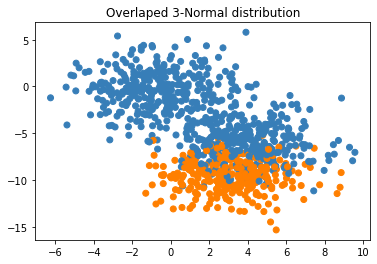

In [5]:
X, X_test, y, y_test = normal(n=1000, prop_test=0.1, noise=2, centers=3, seed=156899)
plot_toy_set(X, y, 'Overlaped 3-Normal distribution')

## Random forest

In [6]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', criterion='gini',random_state=1324)

In [7]:
preds = StratifiedKFoldTestPredictions(X, y, rf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.61,0.05,0.66
1,0.06,0.28,0.34
total,0.67,0.33,1.00


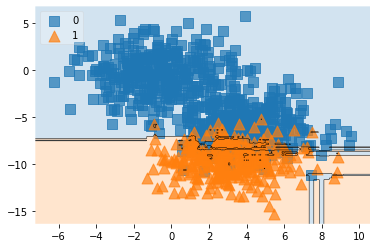

In [8]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, rf, title='')

## SVM

In [9]:
svm = SVC(C=1, gamma = 0.1)

In [10]:
preds = StratifiedKFoldTestPredictions(X, y, svm)
confusion_matrix(svm.predict(X), y)

real,0,1,total
pred,,,
0,0.62,0.04,0.65
1,0.05,0.29,0.35
total,0.67,0.33,1.00


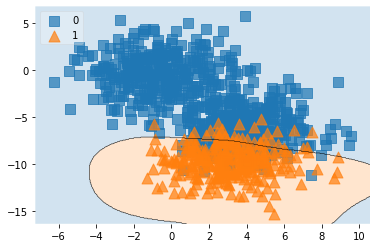

In [11]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, svm, title='')

## MOE SVM (lambda = 1, wrab = False)

In [12]:
method = SVC
params = {'C': [1, 10, 100, 1000], 'kernel':['rbf'], 'gamma': [0.01, 0.1, 1, 10]}

clf = moe(SVC, params, sample_size=None,
    wrab=False,
    max_features='auto',
    lam=1,
    eval_metric=accuracy_score,
    prop_sample=0.1,
    n_learners=10,
    random_state=1234)

In [13]:
preds = StratifiedKFoldTestPredictions(X, y, clf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.62,0.09,0.7
1,0.05,0.25,0.3
total,0.67,0.33,1.0


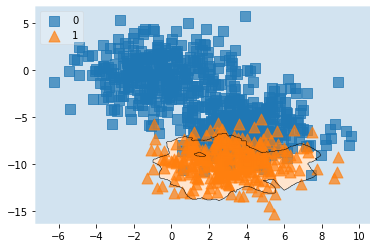

In [14]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

In [15]:
df_learners = pd.DataFrame([{**i['scores'], **{'model':str(i['learner'])}} for i in clf.learners])

print(f'Test error: {df_learners.oob_error.mean().round(2)}({df_learners.oob_error.std().round(2)})')
print(f'Train error: {df_learners.train_error.mean().round(2)}({df_learners.train_error.std().round(2)})')
print(f'L_mo: {df_learners.best_score.mean().round(2)}({df_learners.best_score.std().round(2)})')

Test error: 0.18(0.03)
Train error: 0.0(0.01)
L_mo: 0.04(0.01)


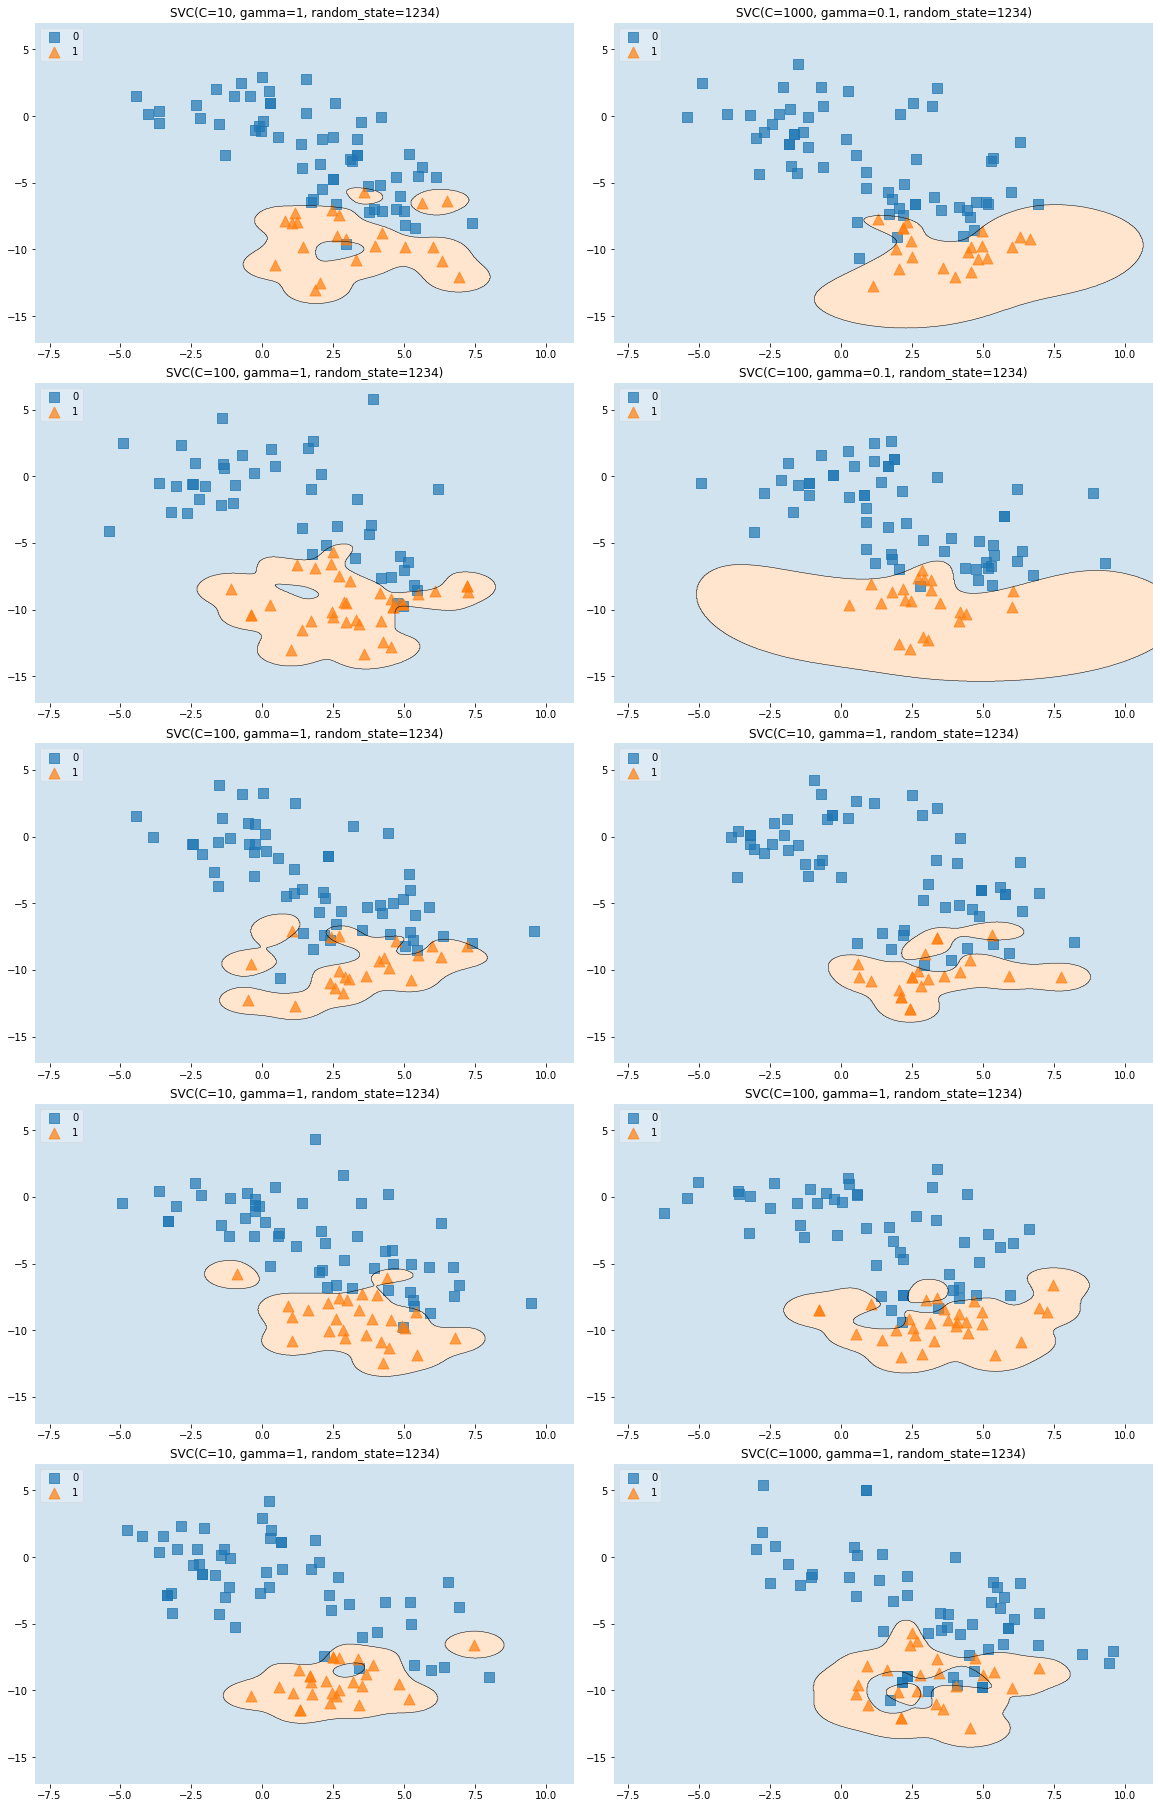

In [16]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners, zoom=0.1)

## MOE SVM (lambda = 3, wrab = False)

In [17]:
method = SVC
params = {'C': [1, 10, 100, 1000], 'kernel':['rbf'], 'gamma': [0.01, 0.1, 1, 10]}


clf = moe(SVC, params, sample_size=None,
    wrab=False,
    max_features='auto',
    lam=3,
    eval_metric=accuracy_score,
    prop_sample=0.1,
    n_learners=10,
    random_state=1234)

In [18]:
preds = StratifiedKFoldTestPredictions(X, y, clf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.62,0.05,0.67
1,0.05,0.28,0.33
total,0.67,0.33,1.00


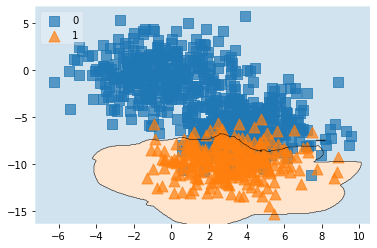

In [19]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

In [20]:
df_learners = pd.DataFrame([{**i['scores'], **{'model':str(i['learner'])}} for i in clf.learners])

print(f'Test error: {df_learners.oob_error.mean().round(2)}({df_learners.oob_error.std().round(2)})')
print(f'Train error: {df_learners.train_error.mean().round(2)}({df_learners.train_error.std().round(2)})')
print(f'L_mo: {df_learners.best_score.mean().round(2)}({df_learners.best_score.std().round(2)})')

Test error: 0.14(0.03)
Train error: 0.04(0.02)
L_mo: 0.07(0.03)


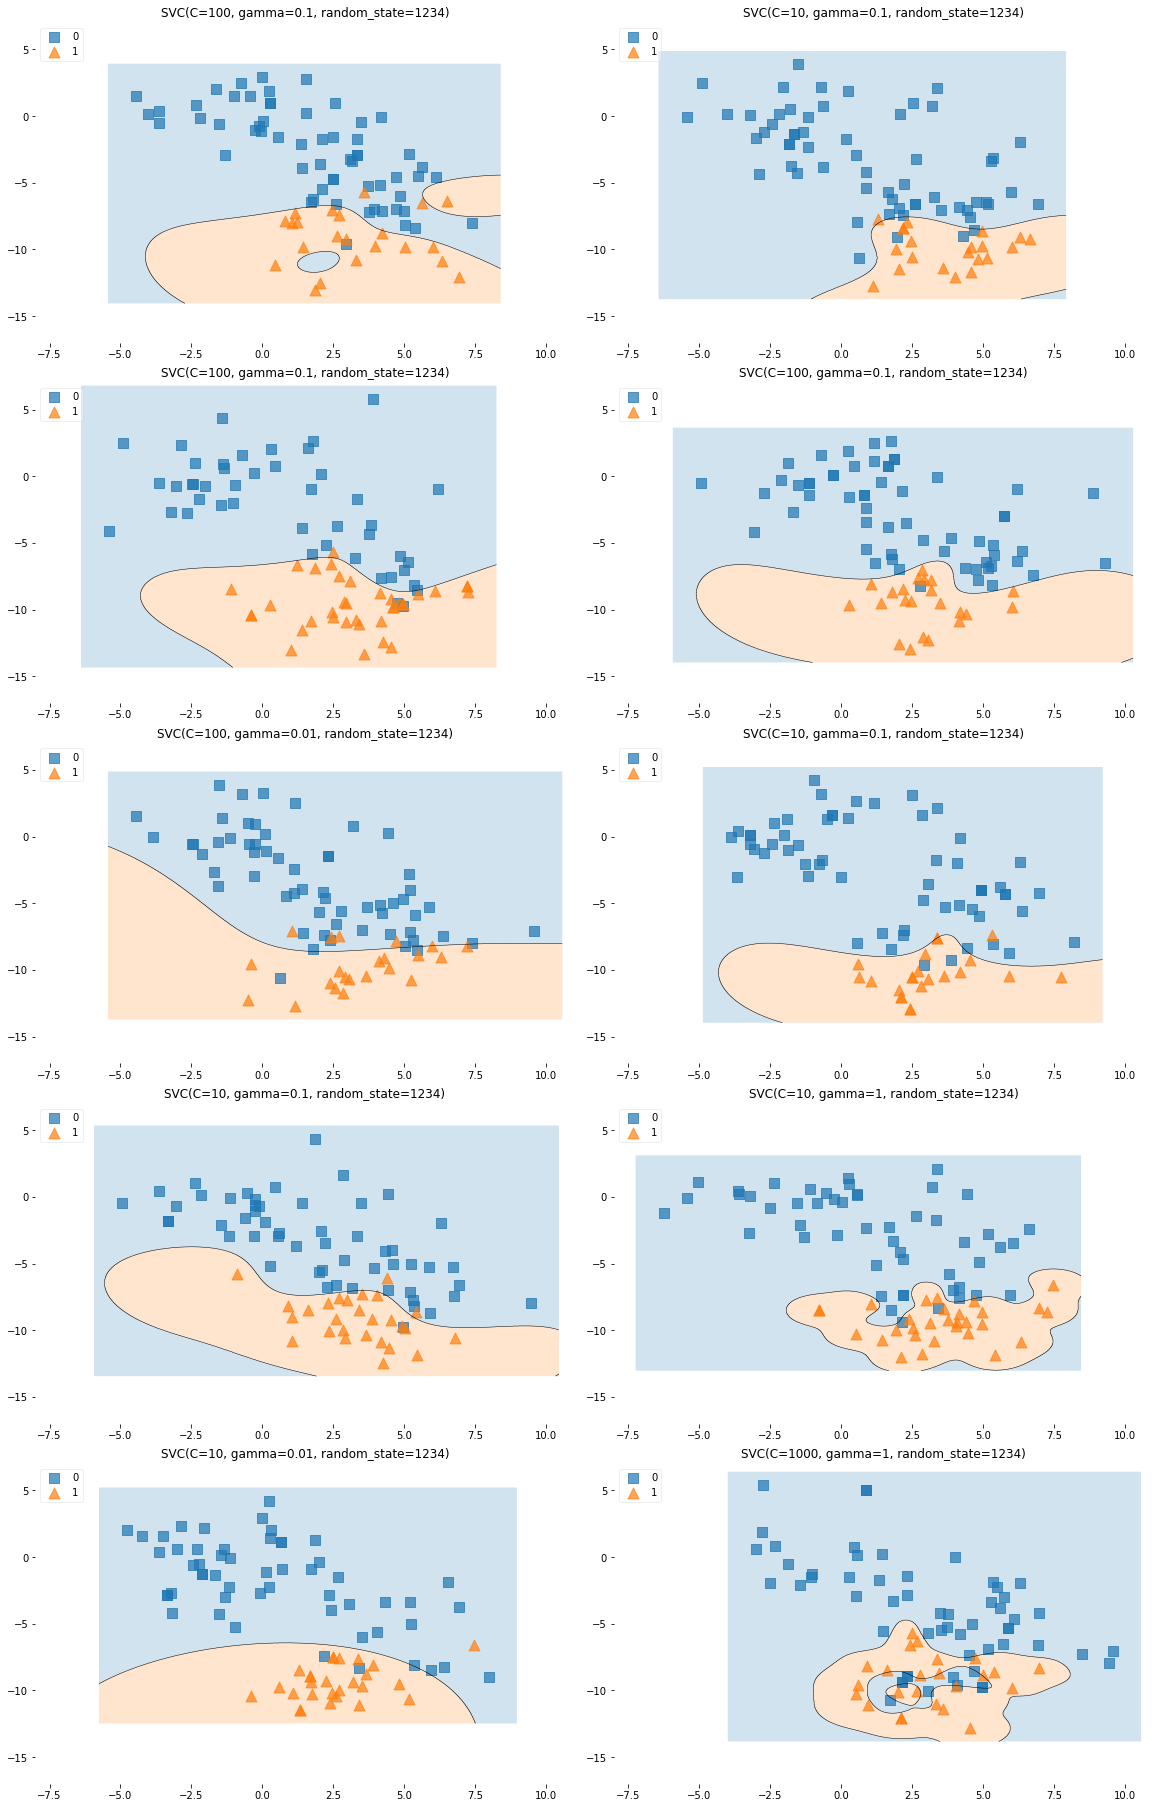

In [21]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners)

## MOE SVM (lambda = 5, wrab = False)

In [22]:
method = SVC
params = {'C': [1, 10, 100, 1000], 'kernel':['rbf'], 'gamma': [0.01, 0.1, 1, 10]}


clf = moe(SVC, params, sample_size=None,
    wrab=False,
    max_features='auto',
    lam=5,
    eval_metric=accuracy_score,
    prop_sample=0.1,
    n_learners=10,
    random_state=1234)

In [23]:
preds = StratifiedKFoldTestPredictions(X, y, clf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.62,0.05,0.68
1,0.04,0.28,0.32
total,0.67,0.33,1.00


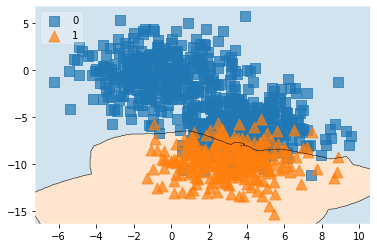

In [24]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

In [25]:
df_learners = pd.DataFrame([{**i['scores'], **{'model':str(i['learner'])}} for i in clf.learners])

print(f'Test error: {df_learners.oob_error.mean().round(2)}({df_learners.oob_error.std().round(2)})')
print(f'Train error: {df_learners.train_error.mean().round(2)}({df_learners.train_error.std().round(2)})')
print(f'L_mo: {df_learners.best_score.mean().round(2)}({df_learners.best_score.std().round(2)})')

Test error: 0.13(0.04)
Train error: 0.06(0.02)
L_mo: 0.09(0.04)


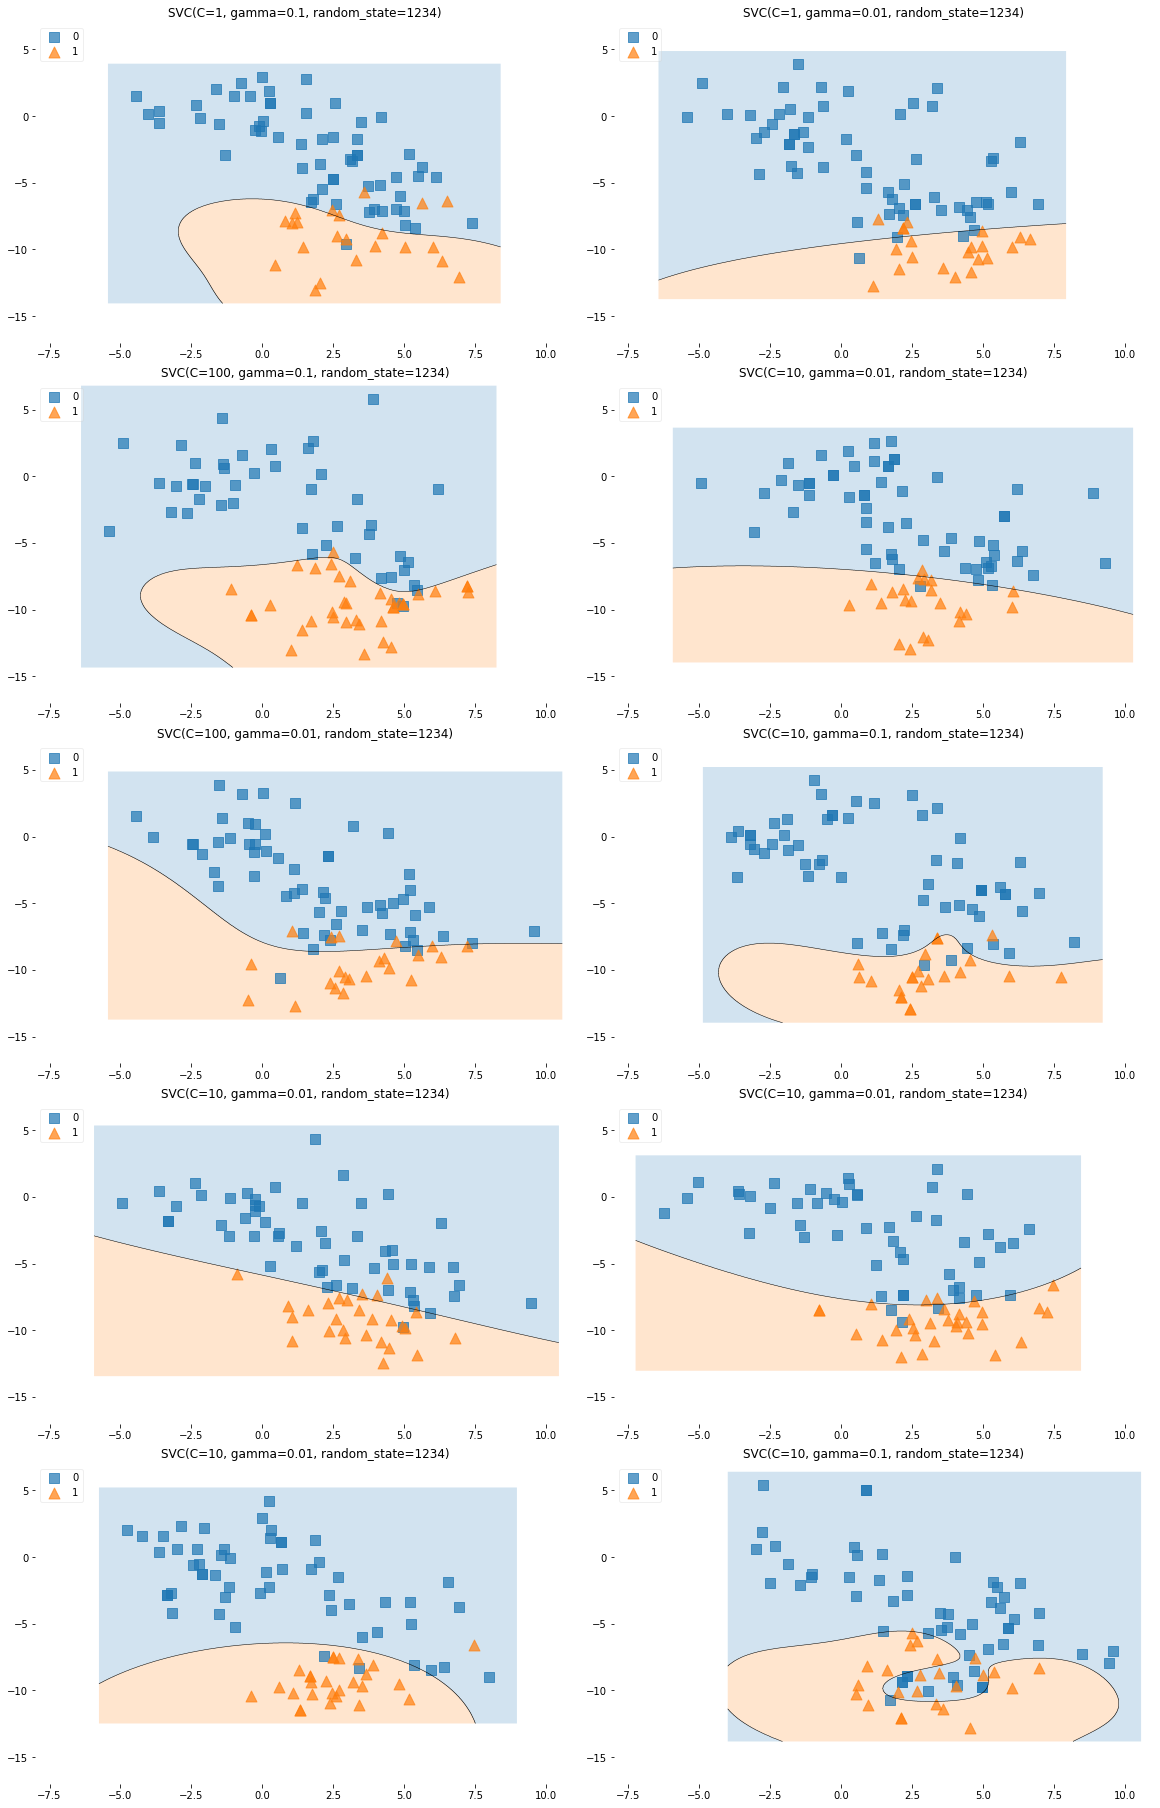

In [26]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners)

## MOE SVM (lambda = 1, wrab = True)

In [27]:
method = SVC
params = {'C': [1, 10, 100, 1000], 'kernel':['rbf'], 'gamma': [0.01, 0.1, 1, 10]}

clf = moe(SVC, params, sample_size=None,
    wrab=True,
    max_features='auto',
    lam=1,
    eval_metric=accuracy_score,
    prop_sample=0.1,
    n_learners=10,
    random_state=1234)

In [28]:
preds = StratifiedKFoldTestPredictions(X, y, clf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.61,0.06,0.66
1,0.06,0.28,0.34
total,0.67,0.33,1.00


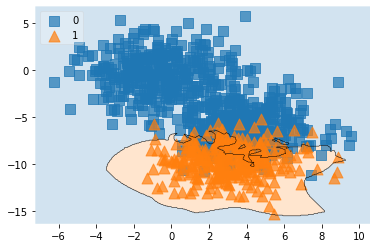

In [29]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

In [30]:
df_learners = pd.DataFrame([{**i['scores'], **{'model':str(i['learner'])}} for i in clf.learners])

print(f'Test error: {df_learners.oob_error.mean().round(2)}({df_learners.oob_error.std().round(2)})')
print(f'Train error: {df_learners.train_error.mean().round(2)}({df_learners.train_error.std().round(2)})')
print(f'L_mo: {df_learners.best_score.mean().round(2)}({df_learners.best_score.std().round(2)})')

Test error: 0.21(0.04)
Train error: 0.01(0.01)
L_mo: 0.05(0.02)


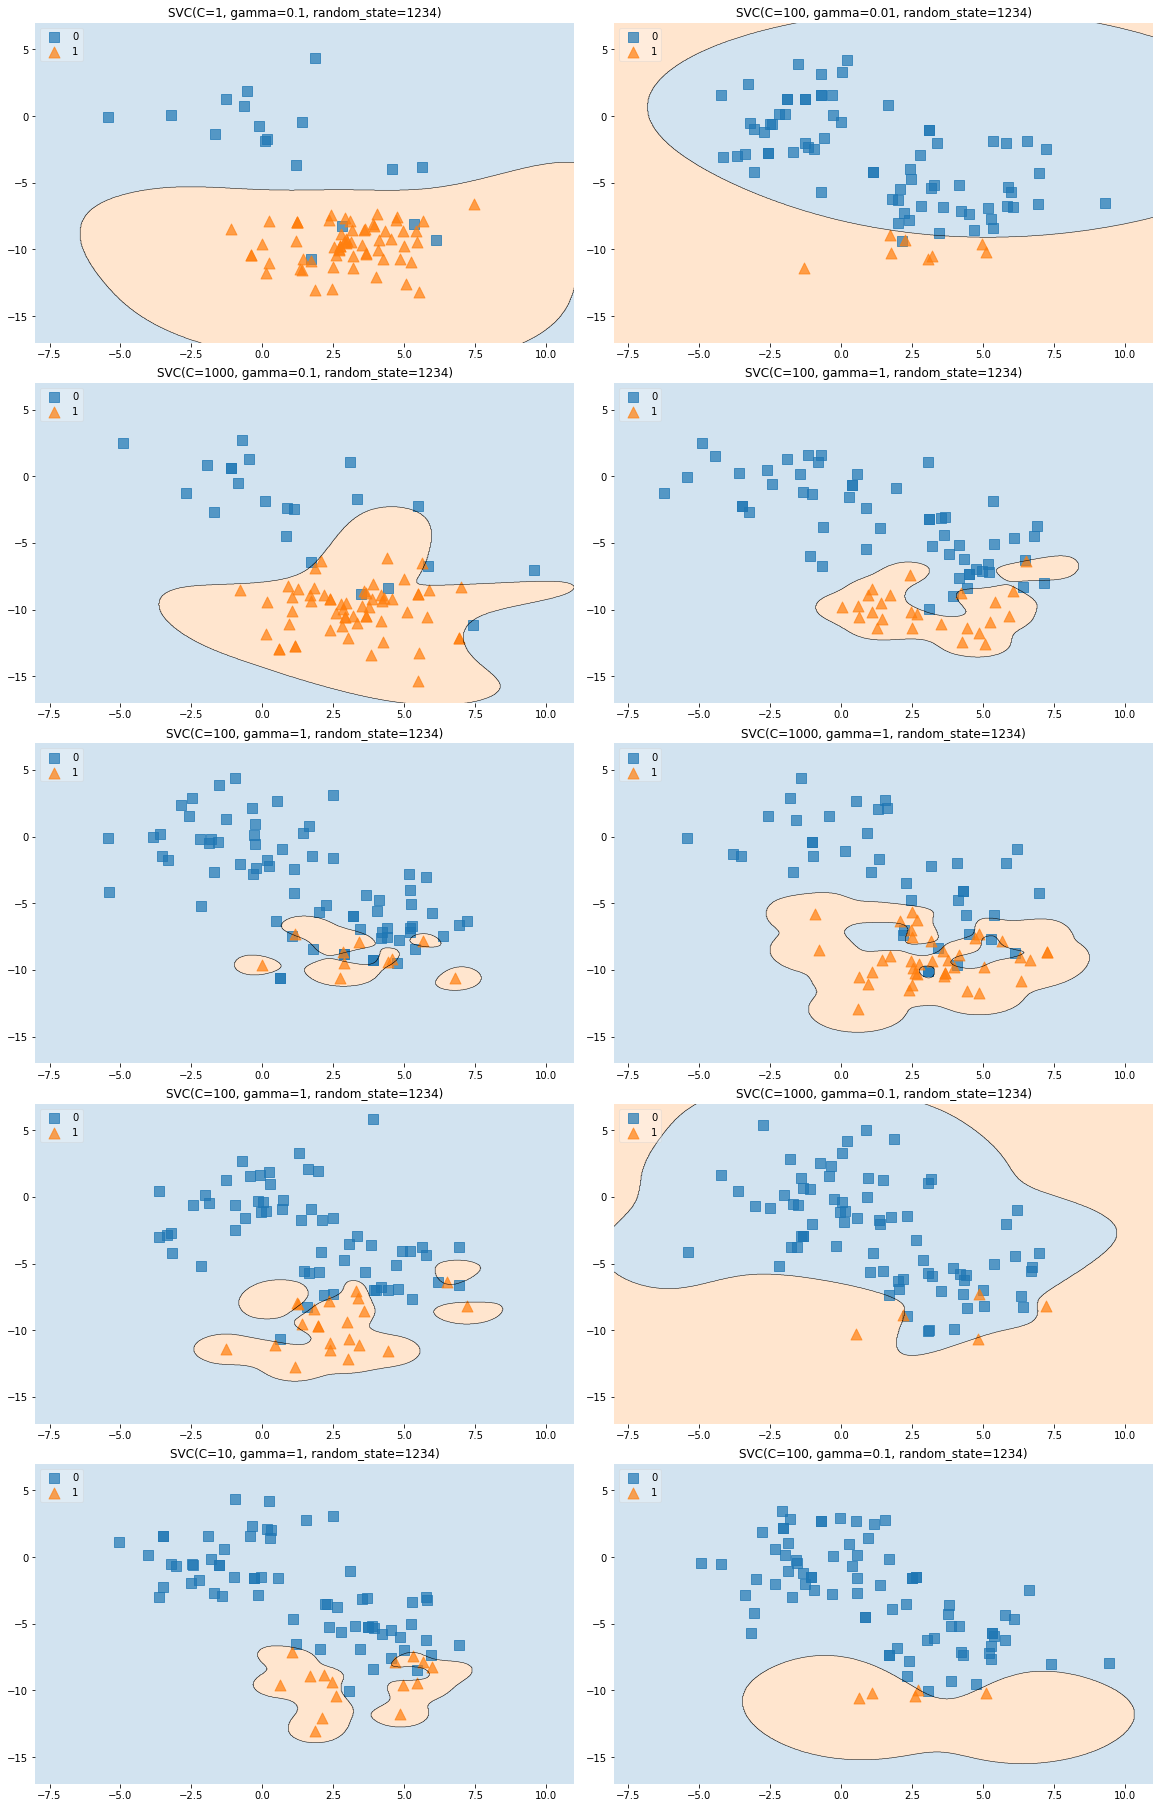

In [31]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners, zoom=0.1)

## MOE SVM (lambda = 3, wrab = True)

In [32]:
method = SVC
params = {'C': [1, 10, 100, 1000], 'kernel':['rbf'], 'gamma': [0.01, 0.1, 1, 10]}

clf = moe(SVC, params, sample_size=None,
    wrab=True,
    max_features='auto',
    lam=3,
    eval_metric=accuracy_score,
    prop_sample=0.1,
    n_learners=10,
    random_state=1234)

In [33]:
preds = StratifiedKFoldTestPredictions(X, y, clf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.62,0.05,0.67
1,0.05,0.28,0.33
total,0.67,0.33,1.00


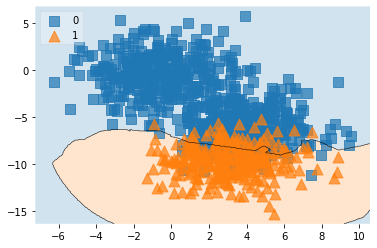

In [34]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

In [35]:
df_learners = pd.DataFrame([{**i['scores'], **{'model':str(i['learner'])}} for i in clf.learners])

print(f'Test error: {df_learners.oob_error.mean().round(2)}({df_learners.oob_error.std().round(2)})')
print(f'Train error: {df_learners.train_error.mean().round(2)}({df_learners.train_error.std().round(2)})')
print(f'L_mo: {df_learners.best_score.mean().round(2)}({df_learners.best_score.std().round(2)})')

Test error: 0.18(0.05)
Train error: 0.04(0.03)
L_mo: 0.11(0.04)


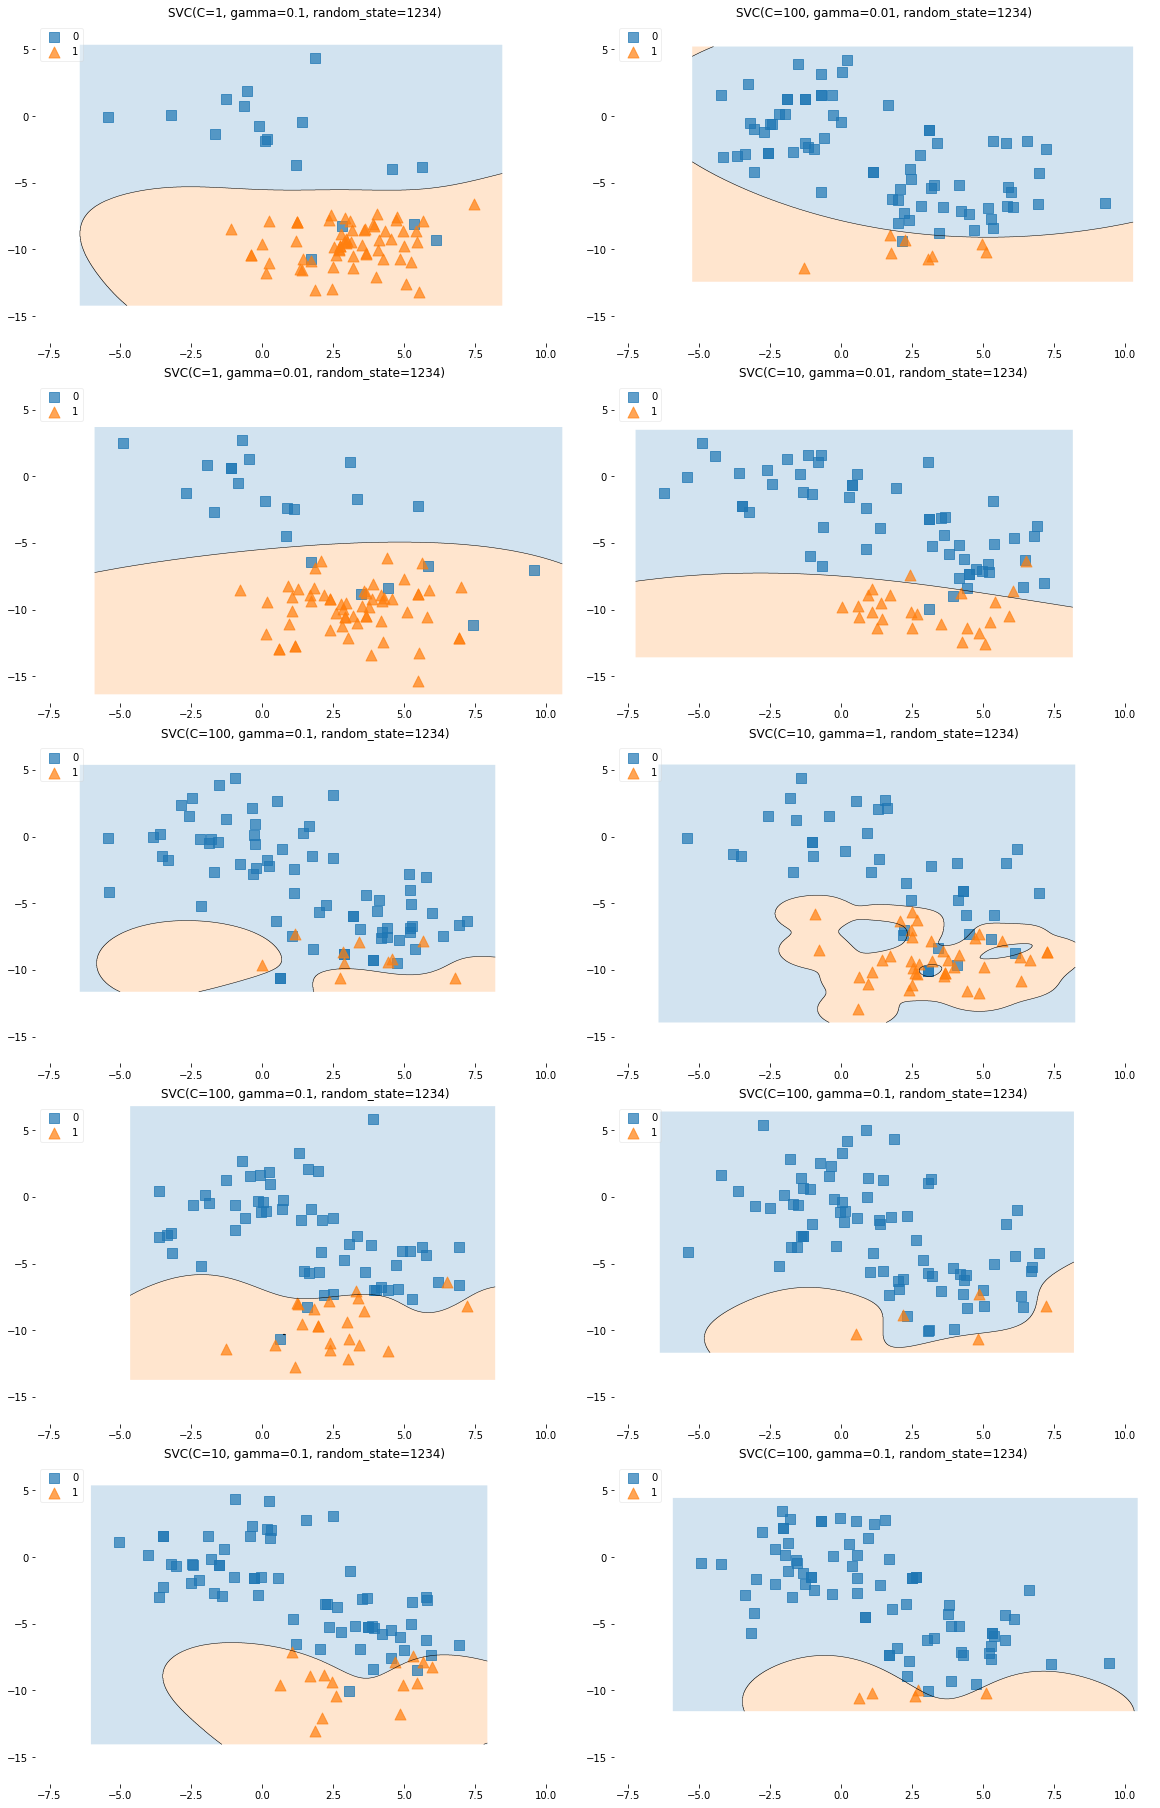

In [36]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners)

## MOE SVM (lambda = 5, wrab = True)

In [37]:
method = SVC
params = {'C': [1, 10, 100, 1000], 'kernel':['rbf'], 'gamma': [0.01, 0.1, 1, 10]}

clf = moe(SVC, params, sample_size=None,
    wrab=True,
    max_features='auto',
    lam=5,
    eval_metric=accuracy_score,
    prop_sample=0.1,
    n_learners=10,
    random_state=1234)

In [38]:
preds = StratifiedKFoldTestPredictions(X, y, clf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.61,0.05,0.67
1,0.05,0.28,0.33
total,0.67,0.33,1.00


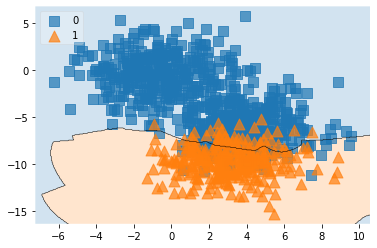

In [39]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

In [40]:
df_learners = pd.DataFrame([{**i['scores'], **{'model':str(i['learner'])}} for i in clf.learners])

print(f'Test error: {df_learners.oob_error.mean().round(2)}({df_learners.oob_error.std().round(2)})')
print(f'Train error: {df_learners.train_error.mean().round(2)}({df_learners.train_error.std().round(2)})')
print(f'L_mo: {df_learners.best_score.mean().round(2)}({df_learners.best_score.std().round(2)})')

Test error: 0.18(0.05)
Train error: 0.05(0.03)
L_mo: 0.15(0.07)


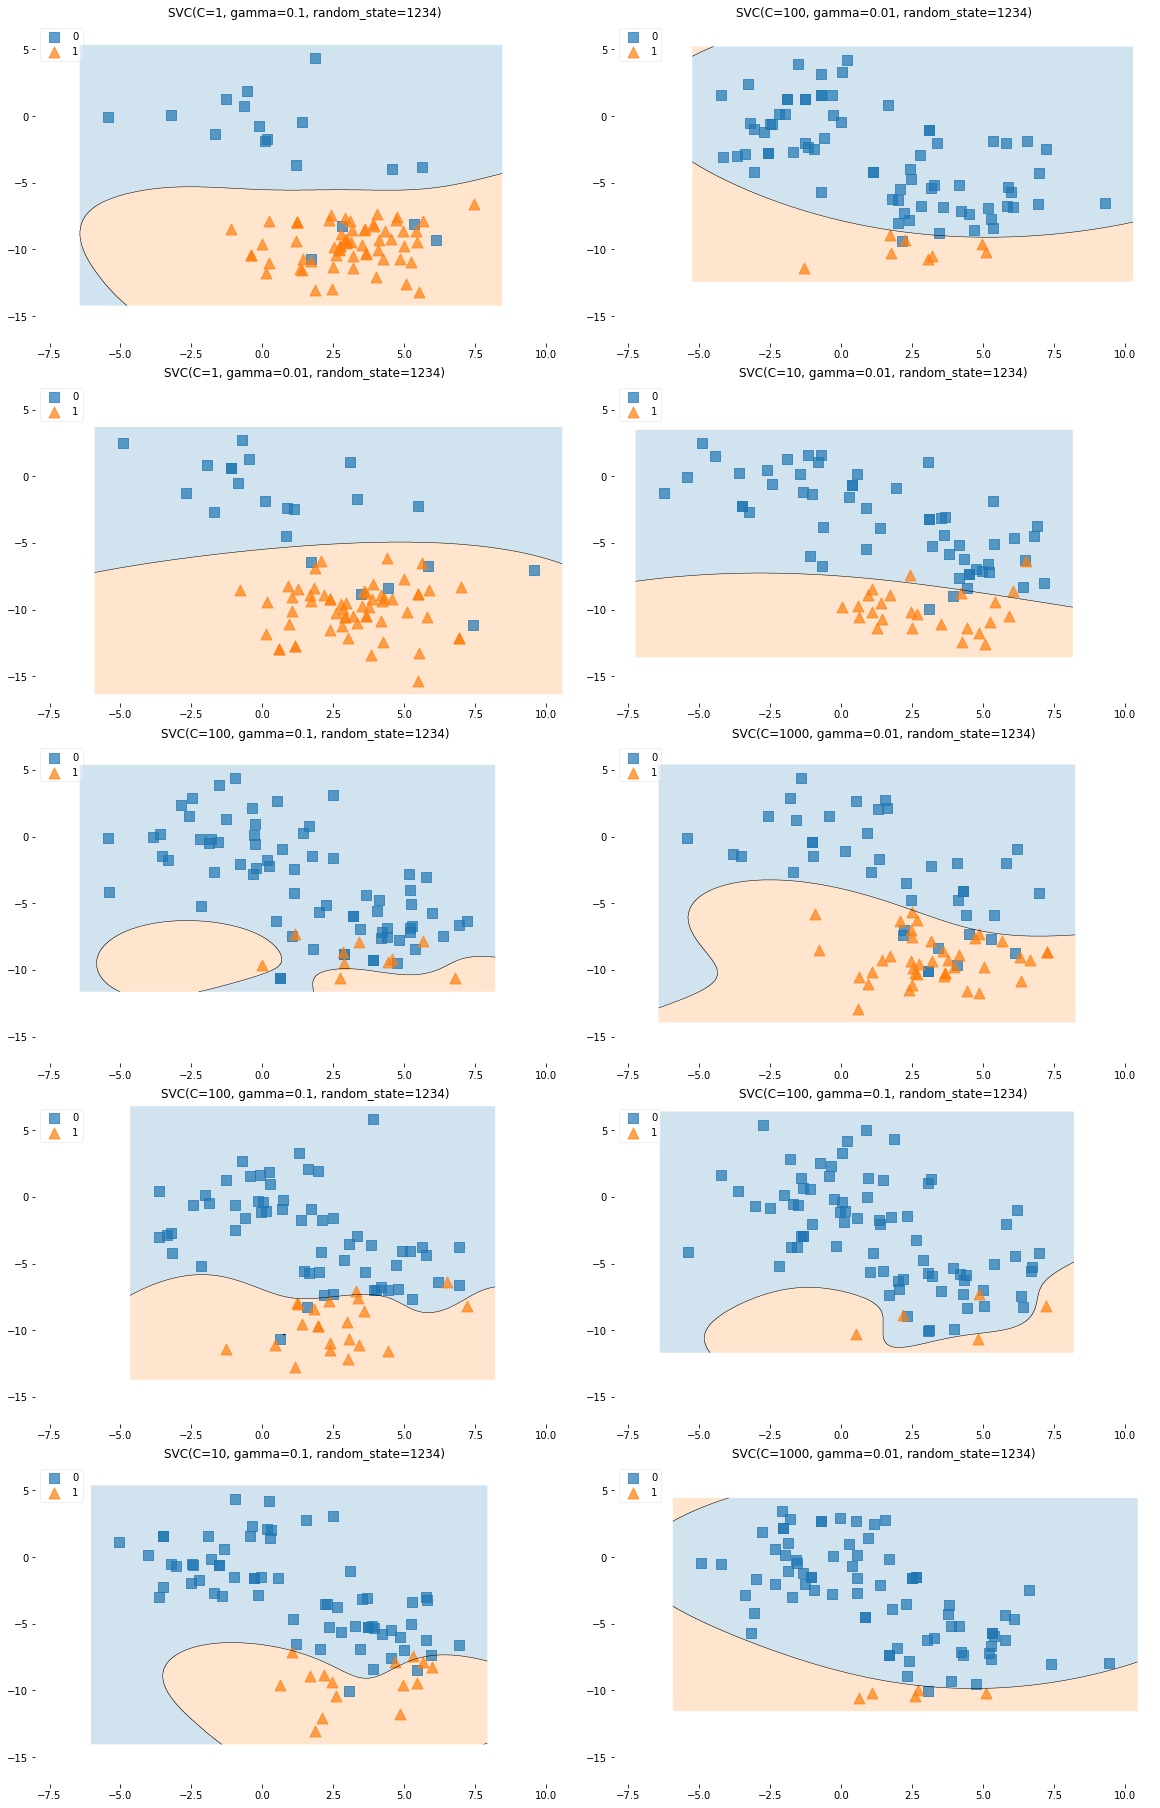

In [41]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners)